In [1]:
import uproot
import matplotlib
import matplotlib.pyplot as plt
import awkward as ak
import hist
import numpy as np
from event_display import gdml_read_ecal_info
import os
import pandas as pd
import matplotlib.patches as mpatches
from scipy.stats import crystalball, norm

%matplotlib inline
matplotlib.rc("figure", dpi=200)

dir_path = os.path.dirname(os.path.realpath("__file__"))
print(f"Believed path is: {dir_path}")

Believed path is: /home/romanov/eic/kak-bog-cherepahu/analysis


In [2]:
import pandas as pd

all_vals_df = pd.read_feather("/mnt/work/data/epi/2022-11-29_cherepaha_SciGlass-4-1-LB_13x13_20x20x400mm_0.5-10GeV_e-pi-_20kev-each.feather")
all_vals_df["e_div_p"] = all_vals_df.de_sum/(all_vals_df.p*1000)
all_vals_df.head()

,p,prt_name,de_sum,towers,e_div_p
0,0.7,e-,680.055847,"[0.0, 0.0, 0.0, 0.34995607250642213, 0.0, 0.0,...",0.971508
1,0.7,e-,692.289707,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.988985
2,0.7,e-,680.219978,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3881120343472...",0.971743
3,0.7,e-,680.248551,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.971784
4,0.7,e-,667.296518,"[0.0, 0.0, 0.47839516986959946, 0.270376541491...",0.953281


In [3]:
def make_2sigma_separation(e_df, pi_df):
    # Fit with crystalball and gauss
    cb_beta, cb_m, cb_loc, cb_scale = crystalball.fit(e_df.e_div_p, loc=0.6)
    norm_loc, norm_scale = norm.fit(e_df.e_div_p)
    print(cb_beta, cb_m, cb_loc, cb_scale)
    print(norm_loc, norm_scale)

    # where we separate
    separ_x = cb_loc - norm_scale*3
    n_pi_above_num = np.size(pi_df.query(f"e_div_p > {separ_x}").e_div_p)
    n_e_below_num = np.size(e_df.query(f"e_div_p <= {separ_x}").e_div_p)
    n_e_above_num = np.size(e_df.query(f"e_div_p > {separ_x}").e_div_p)

    n_pi_above = n_pi_above_num / np.size(pi_df.e_div_p)
    n_e_below = n_e_below_num / np.size(e_df.e_div_p)
    n_e_above = n_e_above_num / np.size(e_df.e_div_p)

    print(separ_x, n_pi_above, n_e_below, n_e_above, np.size(e_df.e_div_p))

    # We can set the number of bins with the *bins* keyword argument.
    fig, axs = plt.subplots()    
    axs.hist(e_df.e_div_p, bins=50, alpha = 0.5, edgecolor='blue', linewidth=0.3, range=(0, 1), density=True, label="$e^{-}$")
    axs.hist(pi_df.e_div_p, bins=50, alpha = 0.5, edgecolor='red', linewidth=0.3, range=(0, 1), density=True, label="$\pi^{-}$")
    axs.axvline(x=separ_x, color='red', linestyle='--', linewidth=0.8, label=f"peak-3$\sigma$ = {separ_x:.2f}")
    axs.plot([], [], ' ', label="$\epsilon_{e^{-}}$ = " + f"{n_e_above*100:.2f}%")
    axs.plot([], [], ' ', label="$\epsilon_{\pi^{-}}$ = " + f"{n_pi_above*100:.2f}%")
    axs.set_title(f"E/P (Birks on) <E> = {e_df.p.mean():.1f} GeV")
    axs.legend(loc='best')
    
    # txt = ax.text(0.5, 0.5, f"{separ_x}\n {n_pi_above}, {n_e_below}, {n_e_above}")
    # txt.set_clip_on(False)
    # handles, labels = plt.get_legend_handles_labels()
    # handles.append(mpatches.Patch(color='none', label=extraString))
    # plt.legend(handles=handles)
    # # txt.set_clip_on(False)  # this will turn clipping off (always visible)
    # plt.plot()

def df_make_separation(df, e_center, range=1):
    e_min = e_center - 0.5*range
    e_max = e_center + 0.5*range
    e_filtered_df = all_vals_df.query(f"({e_min} < p < {e_max}) and prt_name=='e-'")
    pi_filtered_df = all_vals_df.query(f"({e_min} < p < {e_max}) and prt_name=='pi-'")

    make_2sigma_separation(e_filtered_df, pi_filtered_df)


0.4473150298506016 7.749557533624639 0.9786934806661799 0.007321803509267087
0.9655284851604472 0.02803339803960147
0.8945932865473755 0.0416 0.0187 0.9813 20000


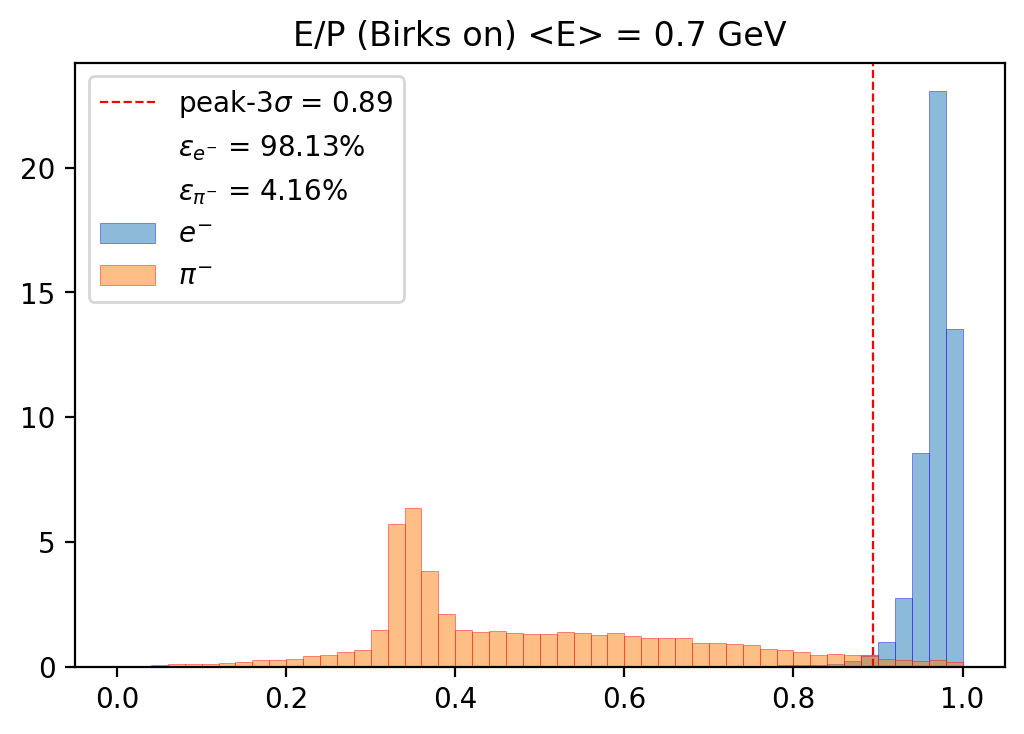

In [4]:
df_make_separation(all_vals_df, 0.7, 0.1)

0.5225374017518649 6.286583376517025 0.9750616195175827 0.007766573695784547
0.9630038004285103 0.02764065512701998
0.8921396541365227 0.01585 0.02015 0.97985 20000


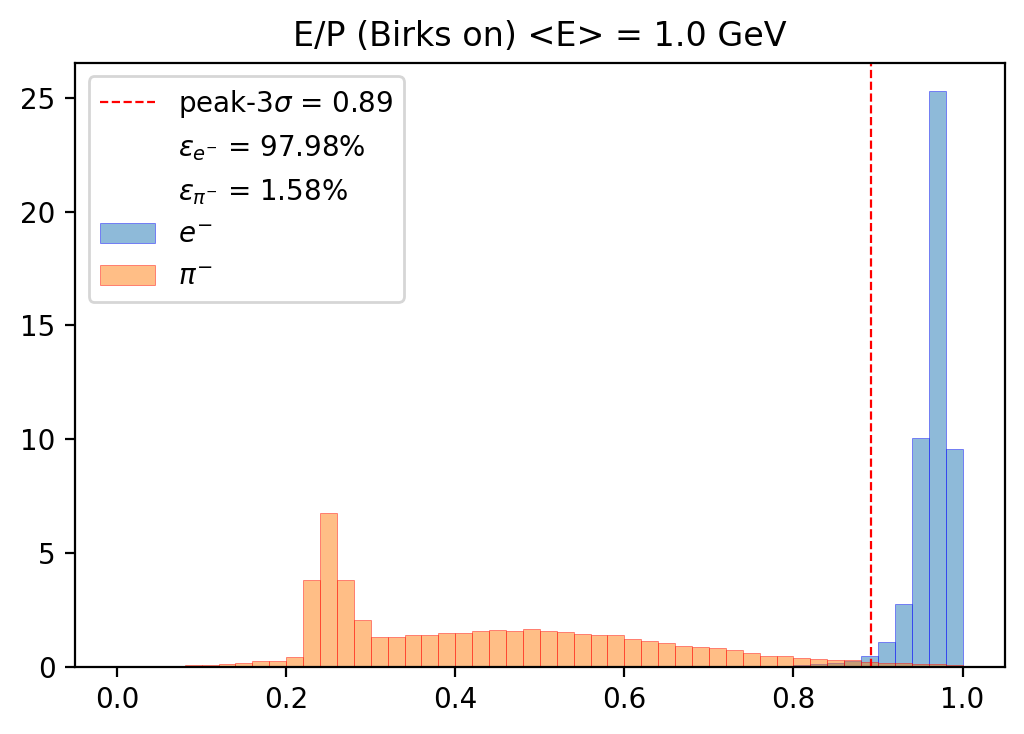

In [7]:
df_make_separation(all_vals_df, 1, 0.1)

In [9]:
#df_make_separation(all_vals_df, 2, 0.1)

In [11]:
df_make_separation(all_vals_df, 5, 0.1)

In [12]:
df_make_separation(all_vals_df, 10, 0.1)

ValueError: zero-size array to reduction operation minimum which has no identity